In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'
tf.random.set_seed(7879)

In [7]:
def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X, dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

## 이진 계단 함수 (Binary step function) 

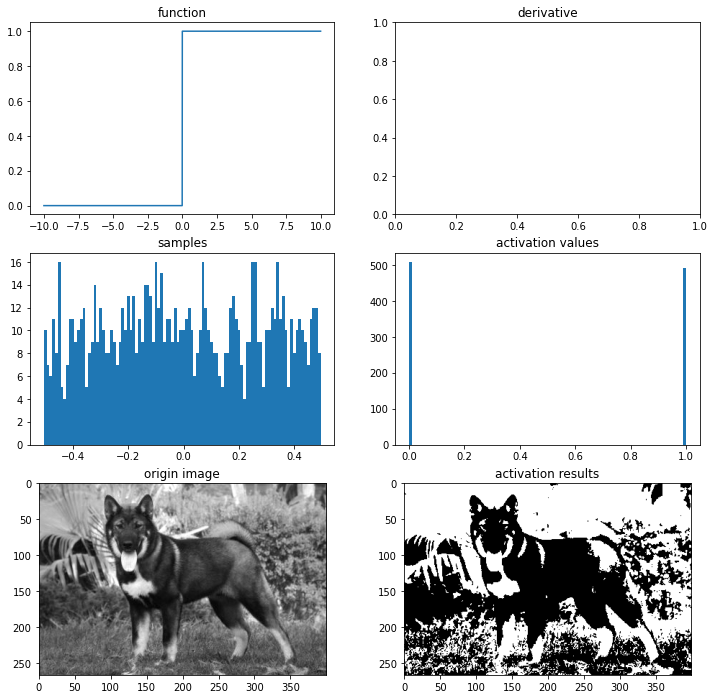

In [8]:
def binary_step(x, threshold=0): 
    return 0 if x<threshold else 1

ax = plot_and_visulize(img_path, binary_step)
ax.show()

## 선형 함수 (linear activation function)

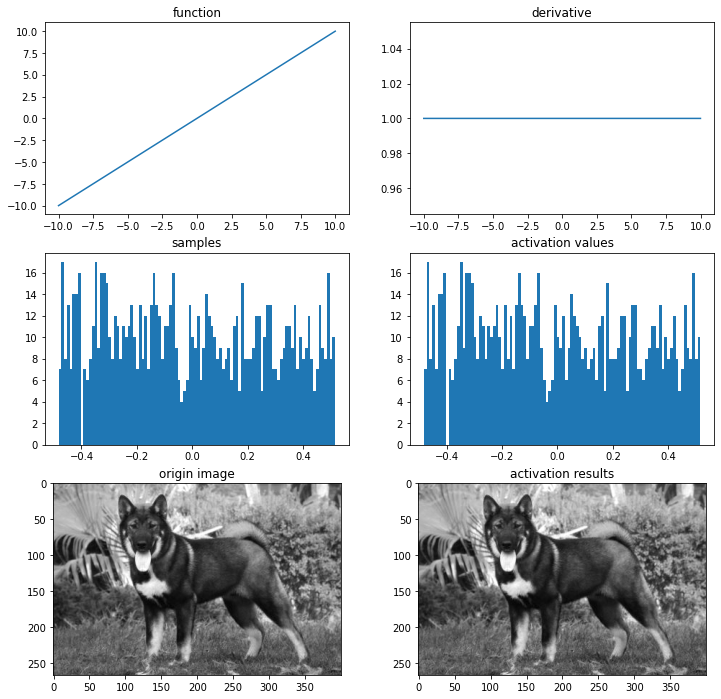

In [9]:
def linear(x):
    return x

def dev_linear(x):
    return 1

ax = plot_and_visulize(img_path, linear, dev_linear)
ax.show()

## 시그모이드 (sigmoid)

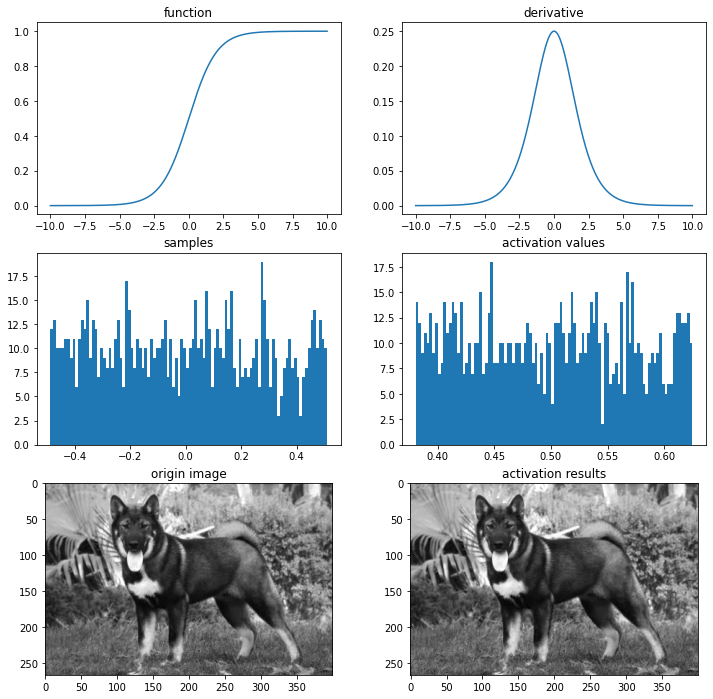

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

## 하이퍼볼릭 탄젠트(tanh)

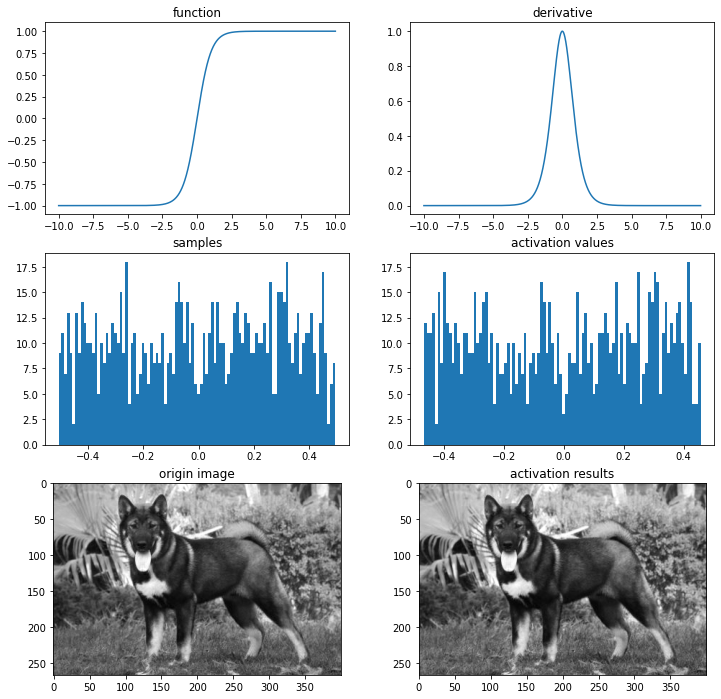

In [11]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()

## ReLU (rectified linear unit)

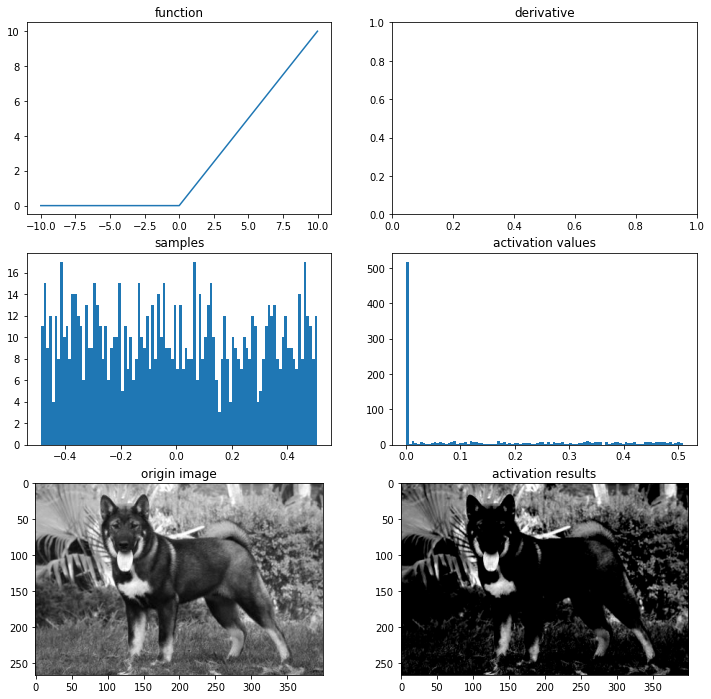

In [12]:
def relu(x):
    return max(0,x)

ax = plot_and_visulize(img_path, relu)
ax.show()

## leaky ReLU

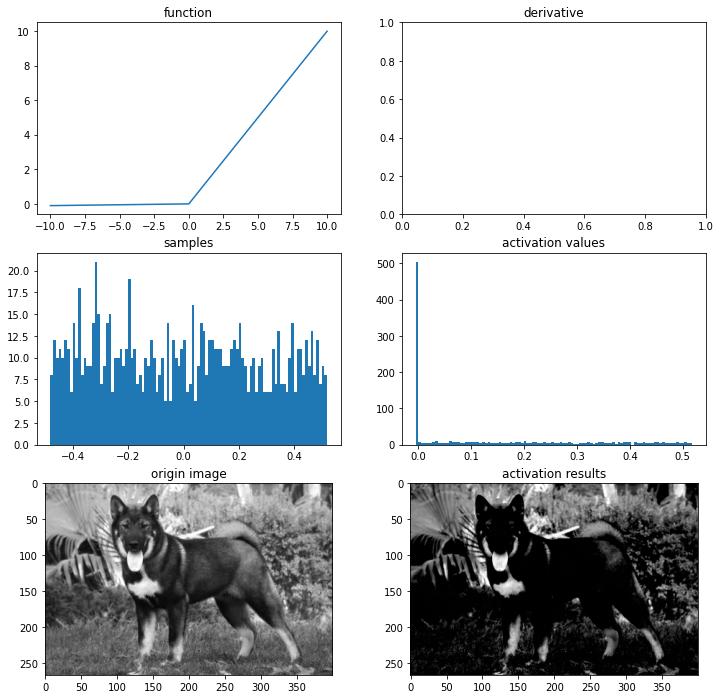

In [13]:
def leaky_relu(x):
    return max(0.01*x,x)

ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

## PReLU (Parametric ReLU)

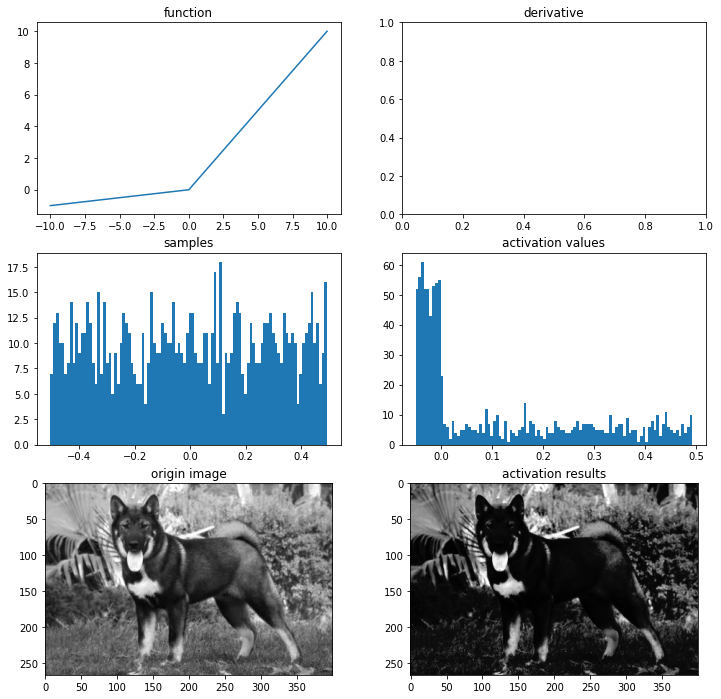

In [14]:
def prelu(x, alpha):
    return max(alpha*x,x)

ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

## ELU (exponential linear unit)

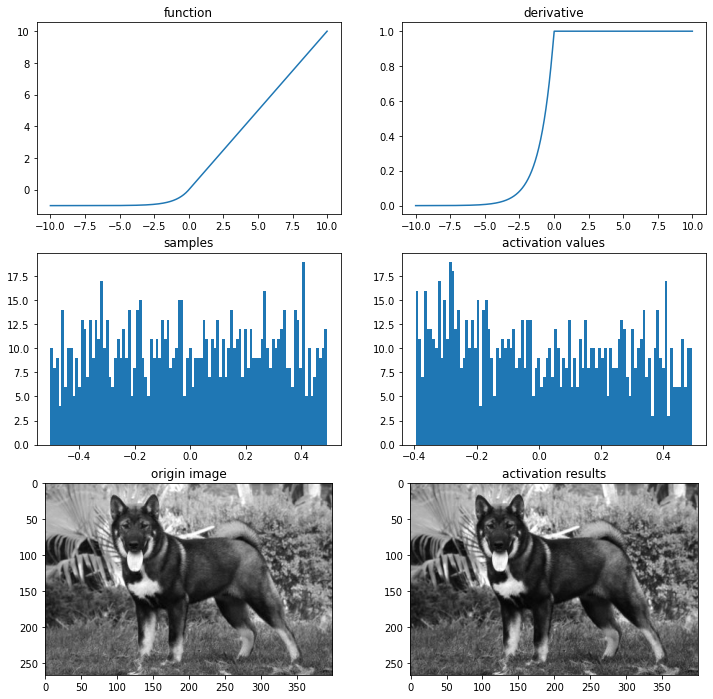

In [15]:
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()